In [44]:
import cv2                            # image processing
import matplotlib.pylab as pltlib     # plot and visualization
import numpy as np                    # numerical computing

In [45]:
# set the style for plots to 'ggplot'
pltlib.style.use('ggplot')            

# read the image using matplotlib and cv2
img_matplotlib = pltlib.imread('C:\Briefcase\Image Processing\ImageProcess\image.jpg')       
img_cv = cv2.imread('C:\Briefcase\Image Processing\ImageProcess\image.jpg')

<>:5: SyntaxWarning: invalid escape sequence '\B'
<>:6: SyntaxWarning: invalid escape sequence '\B'
<>:5: SyntaxWarning: invalid escape sequence '\B'
<>:6: SyntaxWarning: invalid escape sequence '\B'
C:\Users\asus\AppData\Local\Temp\ipykernel_19236\1860020453.py:5: SyntaxWarning: invalid escape sequence '\B'
  img_matplotlib = pltlib.imread('C:\Briefcase\Image Processing\ImageProcess\image.jpg')
C:\Users\asus\AppData\Local\Temp\ipykernel_19236\1860020453.py:6: SyntaxWarning: invalid escape sequence '\B'
  img_cv = cv2.imread('C:\Briefcase\Image Processing\ImageProcess\image.jpg')


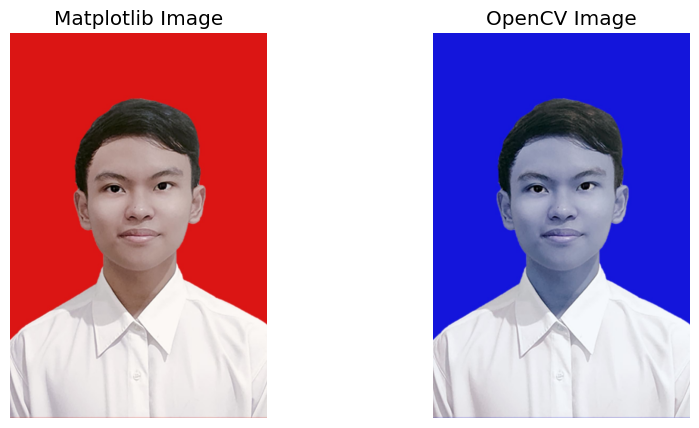

In [46]:
# print image 
fig, axs = pltlib.subplots(1,2, figsize = (10,5))           # create figure and set subplots with specific size 
axs[0].imshow(img_matplotlib)                               # print image
axs[0].axis('off')                                          # turn off the axis
axs[0].set_title("Matplotlib Image")
axs[1].imshow(img_cv)
axs[1].axis('off')
axs[1].set_title("OpenCV Image")
pltlib.show()

In [47]:
# extract pixel
print("Pixel matrix extracting using Matplotlib")
print(img_matplotlib)
print()
print()
print("Pixel matrix extracting using OpenCV")
print(img_cv)

Pixel matrix extracting using Matplotlib
[[[219  21  20]
  [219  21  20]
  [219  21  20]
  ...
  [219  21  20]
  [219  21  20]
  [219  21  20]]

 [[219  21  20]
  [219  21  20]
  [219  21  20]
  ...
  [219  21  20]
  [219  21  20]
  [219  21  20]]

 [[219  21  20]
  [219  21  20]
  [219  21  20]
  ...
  [219  21  20]
  [219  21  20]
  [219  21  20]]

 ...

 [[183 150 157]
  [182 149 156]
  [179 146 153]
  ...
  [228 197 194]
  [228 197 194]
  [228 197 194]]

 [[183 140 149]
  [182 139 148]
  [180 137 146]
  ...
  [223 182 180]
  [223 182 180]
  [223 182 180]]

 [[184 134 143]
  [183 133 142]
  [180 130 139]
  ...
  [220 172 170]
  [220 172 170]
  [220 172 170]]]


Pixel matrix extracting using OpenCV
[[[ 20  21 219]
  [ 20  21 219]
  [ 20  21 219]
  ...
  [ 20  21 219]
  [ 20  21 219]
  [ 20  21 219]]

 [[ 20  21 219]
  [ 20  21 219]
  [ 20  21 219]
  ...
  [ 20  21 219]
  [ 20  21 219]
  [ 20  21 219]]

 [[ 20  21 219]
  [ 20  21 219]
  [ 20  21 219]
  ...
  [ 20  21 219]
  [ 20  21 2

In [48]:
import numpy as np

img_cv_gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

# picking ROI
roi = cv2.selectROI("Set Region of Interest", img_cv_gray, showCrosshair=True, fromCenter=False)     

# saving ROI coordinate
x,y,w,h = roi                       

# crop image based on ROI
cropped_image = img_cv_gray[y:y+h, x:x+w]                                                                   

cv2.imshow("Cropped Image", cropped_image)

# print matrix pixel with grayscale format 
print(np.array(cropped_image))         

# close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

[[173 173 173 173 173 173 173 172 172 173 173 173 173 173 173 174 174 173
  173 173]
 [173 173 173 173 173 173 173 173 173 173 172 172 172 172 172 174 173 173
  173 172]
 [173 173 173 173 173 173 173 173 173 172 172 172 172 171 171 173 173 173
  172 172]
 [173 173 173 173 173 173 173 173 173 172 172 171 171 170 170 173 173 172
  172 171]
 [173 173 173 173 173 173 173 173 173 172 172 171 170 169 169 172 172 172
  171 171]
 [173 173 173 173 173 173 173 174 173 172 171 170 169 168 168 172 172 171
  171 170]
 [173 173 173 173 173 173 173 174 173 172 171 170 169 168 167 172 172 171
  171 170]
 [171 171 172 172 173 173 173 176 176 176 175 173 171 169 167 169 169 169
  169 169]
 [171 171 172 172 173 173 173 176 176 176 175 173 171 169 168 169 169 169
  169 169]
 [171 171 171 172 172 173 173 175 175 175 174 173 171 169 168 169 169 169
  169 169]
 [170 170 171 171 172 172 172 174 174 174 174 173 171 169 168 169 169 169
  169 169]
 [170 170 170 171 171 172 172 172 173 173 173 172 171 169 168 169

(1464, 976, 3)
256


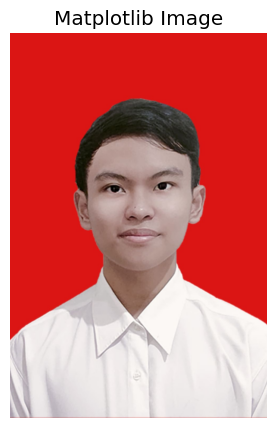

In [49]:
# Spatial Resolution info 
# Graylevel Info 

fig, ax = pltlib.subplots(figsize = (10,5))
ax.imshow(img_matplotlib)
ax.axis('off')
ax.set_title("Matplotlib Image")

print(img_matplotlib.shape)
L = len(np.unique(img_matplotlib))
print(L)

In [50]:

# Function: Lightness Method
def rgb_to_gray_lightness(img):
    return (np.max(img, axis=2) + np.min(img, axis=2)) / 2

# Function: Average Method
def rgb_to_gray_average(img):
    return np.mean(img, axis=2)

# Function: Luminosity Method
def rgb_to_gray_luminosity(img):
    return np.dot(img[..., :3], [0.21, 0.71, 0.07])

gray_lightness = rgb_to_gray_lightness(img_matplotlib)
gray_average = rgb_to_gray_average(img_matplotlib)
gray_luminosity = rgb_to_gray_luminosity(img_matplotlib)

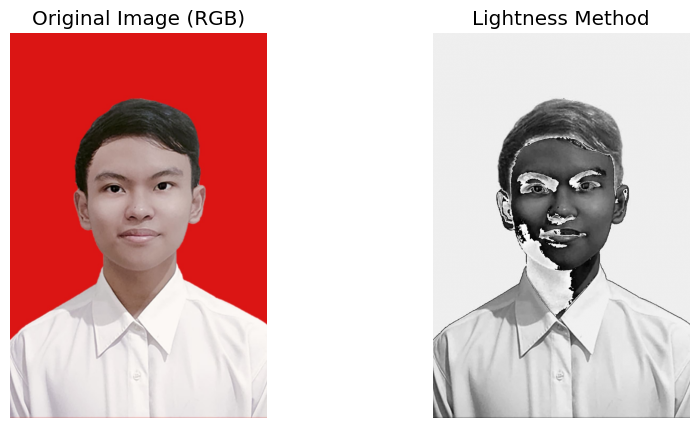

In [51]:
fig, axs = pltlib.subplots(1,2, figsize = (10,5))           # create figure and set subplots with specific size 
axs[0].imshow(img_matplotlib)                               # print image
axs[0].axis('off')                                          # turn off the axis
axs[0].set_title("Original Image (RGB)")
axs[1].imshow(gray_lightness, cmap='gray')
axs[1].axis('off')
axs[1].set_title("Lightness Method")
pltlib.show()

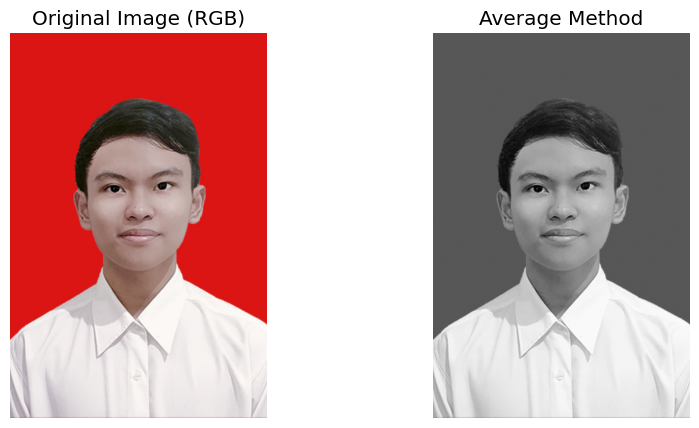

In [52]:
fig, axs = pltlib.subplots(1,2, figsize = (10,5))           # create figure and set subplots with specific size 
axs[0].imshow(img_matplotlib)                               # print image
axs[0].axis('off')                                          # turn off the axis
axs[0].set_title("Original Image (RGB)")
axs[1].imshow(gray_average, cmap='gray')
axs[1].axis('off')
axs[1].set_title("Average Method")
pltlib.show()

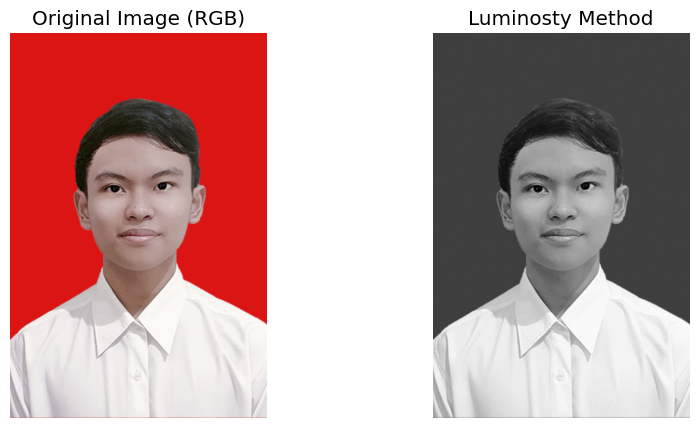

In [53]:
fig, axs = pltlib.subplots(1,2, figsize = (10,5))           # create figure and set subplots with specific size 
axs[0].imshow(img_matplotlib)                               # print image
axs[0].axis('off')                                          # turn off the axis
axs[0].set_title("Original Image (RGB)")
axs[1].imshow(gray_luminosity, cmap='gray')
axs[1].axis('off')
axs[1].set_title("Luminosty Method")
pltlib.show()


In [54]:
# 1. Intensity Transformation 

# a. Image Negative
def image_negative(img):
    """
    Menghasilkan negatif dari citra dengan mengurangkan nilai piksel dari 255.
    """
    return 255 - img

# b. Log Transformation
def log_transformation(img, c=1):
    """
    Parameter c digunakan untuk mengontrol tingkat kecerahan hasil.
    """
    img_float = img.astype(float)
    log_image = c * np.log1p(img_float)  # np.log1p = log(1 + x) untuk stabilitas numerik
    return np.clip(log_image, 0, 255).astype(np.uint8)

# c. Power Law Transformation
def power_law_transformation(img, gamma, c=1):
    """
    Gamma < 1 akan mencerahkan, gamma > 1 akan menggelapkan.
    """
    img_norm = img.astype(float) / 255.0
    power_image = c * np.power(img_norm, gamma) * 255
    return np.clip(power_image, 0, 255).astype(np.uint8)

# d. Power Law Transformation
def piecewise_linear_transformation(img):
    """
    Menerapkan transformasi linier berbasis tiga rentang nilai:
    - Rendah: dikalikan 0.5
    - Sedang: digeser dan dikalikan 1.0
    - Tinggi: digeser dan dikalikan 1.5
    """
    img_float = img.astype(float)
    transformed = np.zeros_like(img_float)

    # Rentang rendah
    mask1 = img_float < 85
    transformed[mask1] = img_float[mask1] * 0.5

    # Rentang sedang
    mask2 = (img_float >= 85) & (img_float < 170)
    transformed[mask2] = (img_float[mask2] - 85) * 1.0 + 42.5

    # Rentang tinggi
    mask3 = img_float >= 170
    transformed[mask3] = (img_float[mask3] - 170) * 1.5 + 127.5

    return np.clip(transformed, 0, 255).astype(np.uint8)

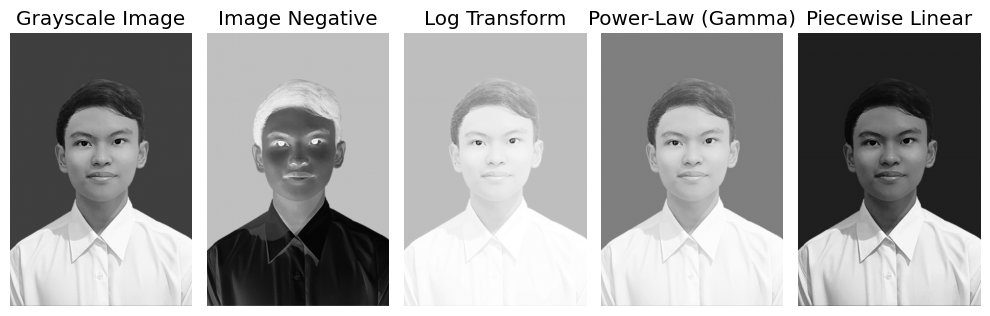

In [55]:
negative_img = image_negative(gray_luminosity)
log_img = log_transformation(gray_luminosity, c=20)  # c bisa disesuaikan
gamma_img = power_law_transformation(gray_luminosity, gamma=0.5)  # contoh gamma < 1
piecewise_img = piecewise_linear_transformation(gray_luminosity)

# Buat subplot 2 baris x 4 kolom
fig, axs = pltlib.subplots(1, 5, figsize=(10, 5))

axs[0].imshow(gray_luminosity,  cmap='gray')
axs[0].axis('off')
axs[0].set_title("Grayscale Image")

axs[1].imshow(negative_img, cmap='gray')
axs[1].axis('off')
axs[1].set_title("Image Negative")

axs[2].imshow(log_img, cmap='gray')
axs[2].axis('off')
axs[2].set_title("Log Transform")

axs[3].imshow(gamma_img, cmap='gray')
axs[3].axis('off')
axs[3].set_title("Power-Law (Gamma)")

axs[4].imshow(piecewise_img, cmap='gray')
axs[4].axis('off')
axs[4].set_title("Piecewise Linear")

pltlib.tight_layout()
pltlib.show()

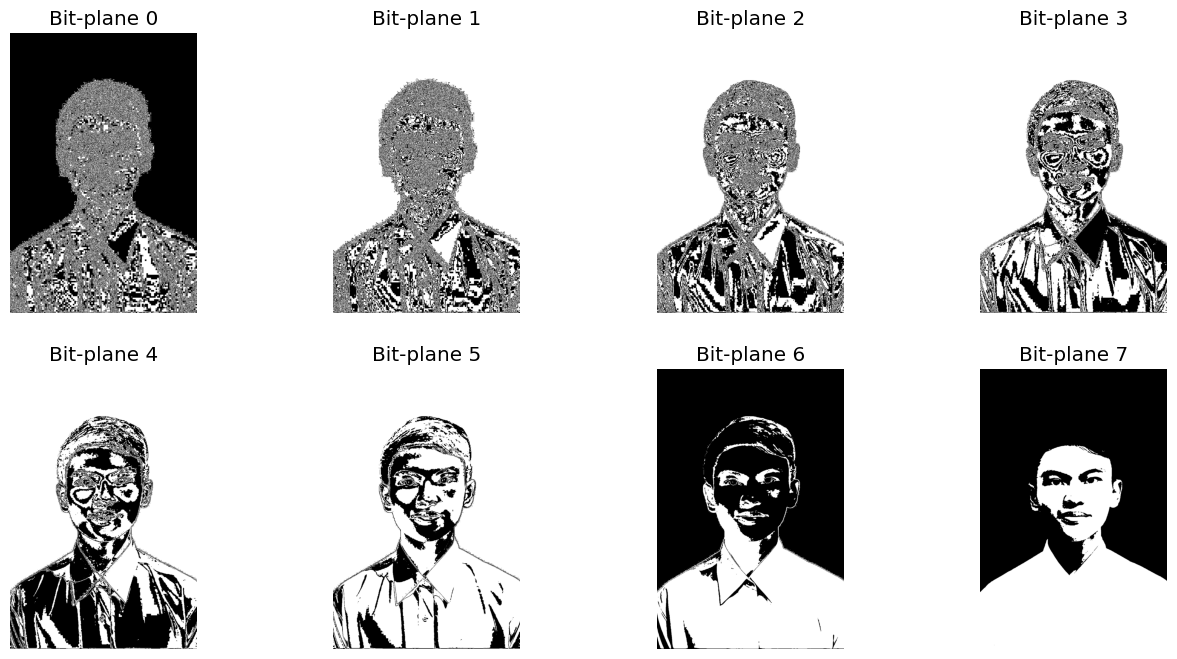

In [56]:
# 2. Bit Plane Slicing
def bit_plane_slicing(img, bit):
    """
    Bit ke-0 adalah LSB (Least Significant Bit), bit ke-7 adalah MSB (Most Significant Bit).
    """
    img_int = img.astype(int)  # ubah ke integer, aman buat operasi bit
    return ((img_int >> bit) & 1) * 255

# Visualisasi semua bit-plane dari gambar grayscale
fig, axs = pltlib.subplots(2, 4, figsize=(16, 8))
axs = axs.ravel()

for i in range(8):
    bit_img = bit_plane_slicing(gray_luminosity, i)  # ← perbaikan di sini
    axs[i].imshow(bit_img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f'Bit-plane {i}')

pltlib.show()

(np.float64(-0.5), np.float64(975.5), np.float64(1463.5), np.float64(-0.5))

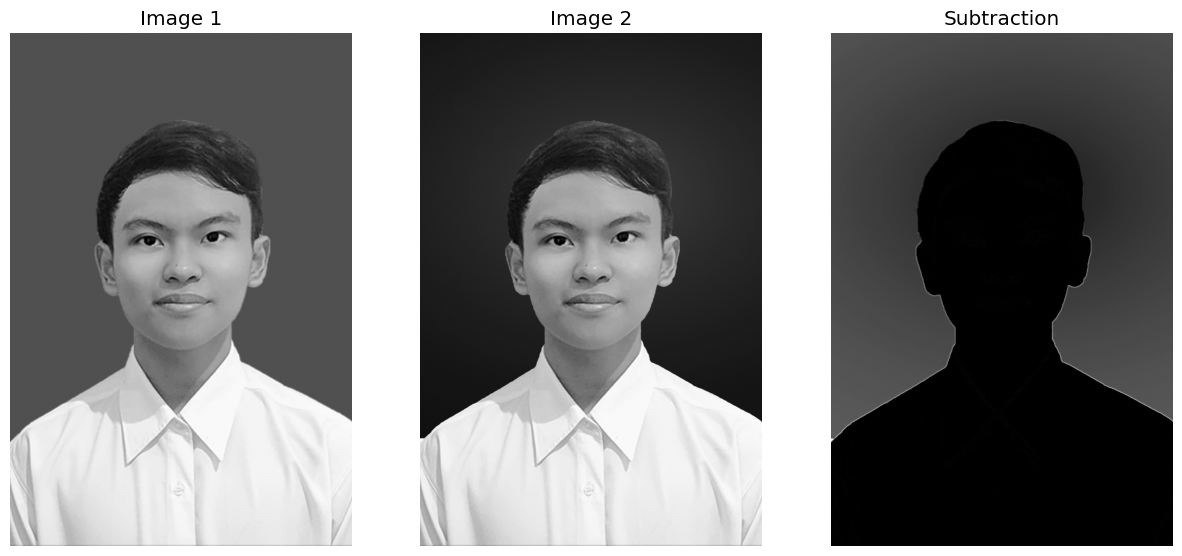

In [57]:
# 3. Image Subtraction
def image_subtraction(img1, img2):
    """
    Mengurangi dua gambar menggunakan per piksel absolute difference.
    Cocok untuk mendeteksi perubahan antar dua citra.
    """
    return cv2.absdiff(img1, img2)

img1 = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

subtracted = image_subtraction(img1, img2)

fig, axs = pltlib.subplots(1, 3, figsize=(15, 10))
axs = axs.ravel()

axs[0].imshow(img1, cmap='gray')
axs[0].set_title("Image 1")
axs[0].axis('off')

axs[1].imshow(img2, cmap='gray')
axs[1].set_title("Image 2")
axs[1].axis('off')

axs[2].imshow(subtracted, cmap='gray')
axs[2].set_title("Subtraction")
axs[2].axis('off')

(np.float64(-0.5), np.float64(975.5), np.float64(1463.5), np.float64(-0.5))

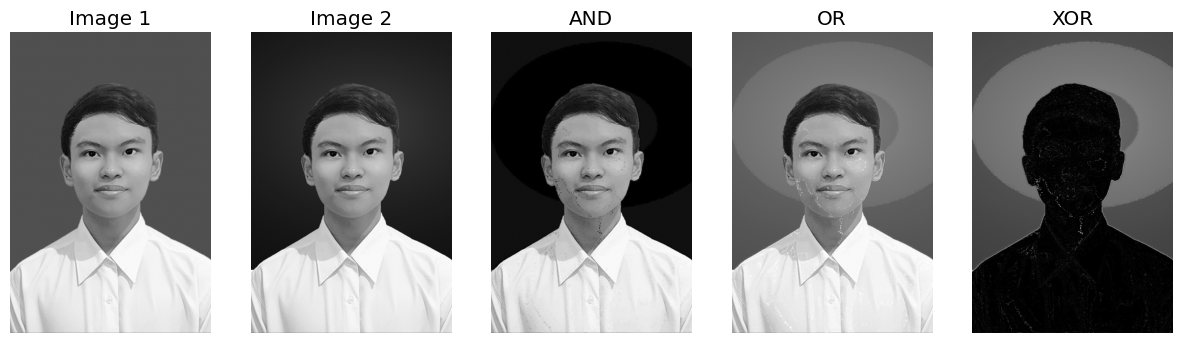

In [58]:
#4. Logic Operator
def logical_and(img1, img2):
    return cv2.bitwise_and(img1, img2)

def logical_or(img1, img2):
    return cv2.bitwise_or(img1, img2)

def logical_xor(img1, img2):
    return cv2.bitwise_xor(img1, img2)

img1 = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

and_result = logical_and(img1, img2)
or_result = logical_or(img1, img2)
xor_result = logical_xor(img1, img2)


fig, axs = pltlib.subplots(1, 5, figsize=(15, 10))
axs = axs.ravel()

axs[0].imshow(img1, cmap='gray')
axs[0].set_title("Image 1")
axs[0].axis('off')

axs[1].imshow(img2, cmap='gray')
axs[1].set_title("Image 2")
axs[1].axis('off')

axs[2].imshow(and_result, cmap='gray')
axs[2].set_title("AND")
axs[2].axis('off')

axs[3].imshow(or_result, cmap='gray')
axs[3].set_title("OR")
axs[3].axis('off')

axs[4].imshow(xor_result, cmap='gray')
axs[4].set_title("XOR")
axs[4].axis('off')

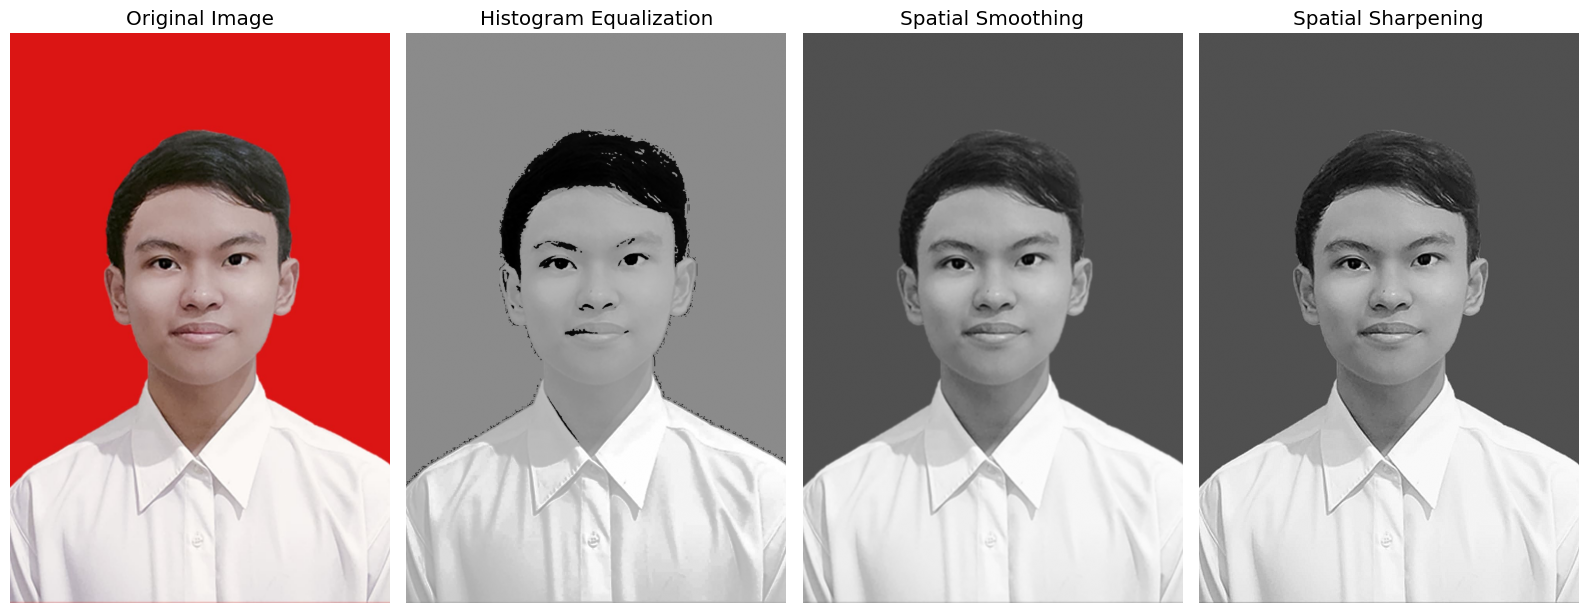

In [59]:

def histogram_equalization(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    equalized = cv2.equalizeHist(img_gray)
    return equalized

def spatial_smoothing(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    smoothed = cv2.GaussianBlur(img_gray, (5, 5), 0)
    return smoothed

def spatial_sharpening(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(img_gray, -1, kernel)
    return sharpened

# Proses gambar
heq = histogram_equalization(img_matplotlib)
smooth = spatial_smoothing(img_matplotlib)
sharp = spatial_sharpening(img_matplotlib)

# Visualisasi hasil
fig, axs = pltlib.subplots(1, 4, figsize=(16, 6))
axs = axs.ravel()

axs[0].imshow(img_matplotlib)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(heq, cmap='gray')
axs[1].set_title("Histogram Equalization")
axs[1].axis('off')

axs[2].imshow(smooth, cmap='gray')
axs[2].set_title("Spatial Smoothing")
axs[2].axis('off')

axs[3].imshow(sharp, cmap='gray')
axs[3].set_title("Spatial Sharpening")
axs[3].axis('off')

pltlib.tight_layout()
pltlib.show()

In [60]:
# Convert RGB to 

# CMY
def rgb_to_cmy(img):
    image_float = img.astype(np.float32) / 255.0
    
    # Calculate CMY
    cmy = 1 - image_float
    C, M, Y = cmy[...,0], cmy[...,1], cmy[...,2]
    
    # Create individual color layers
    cyan_image = ((np.stack([C*0, C, C], axis=2))*255).astype(np.uint8)
    magenta_image = ((np.stack([M, M*0, M], axis=2))*255).astype(np.uint8)
    yellow_image = ((np.stack([Y, Y, Y*0], axis=2))*255).astype(np.uint8)
    
    # Create CMY composite
    cmy_image = ((np.stack([C,M,Y], axis=2))*255).astype(np.uint8)
    
    return cyan_image, magenta_image, yellow_image, cmy_image

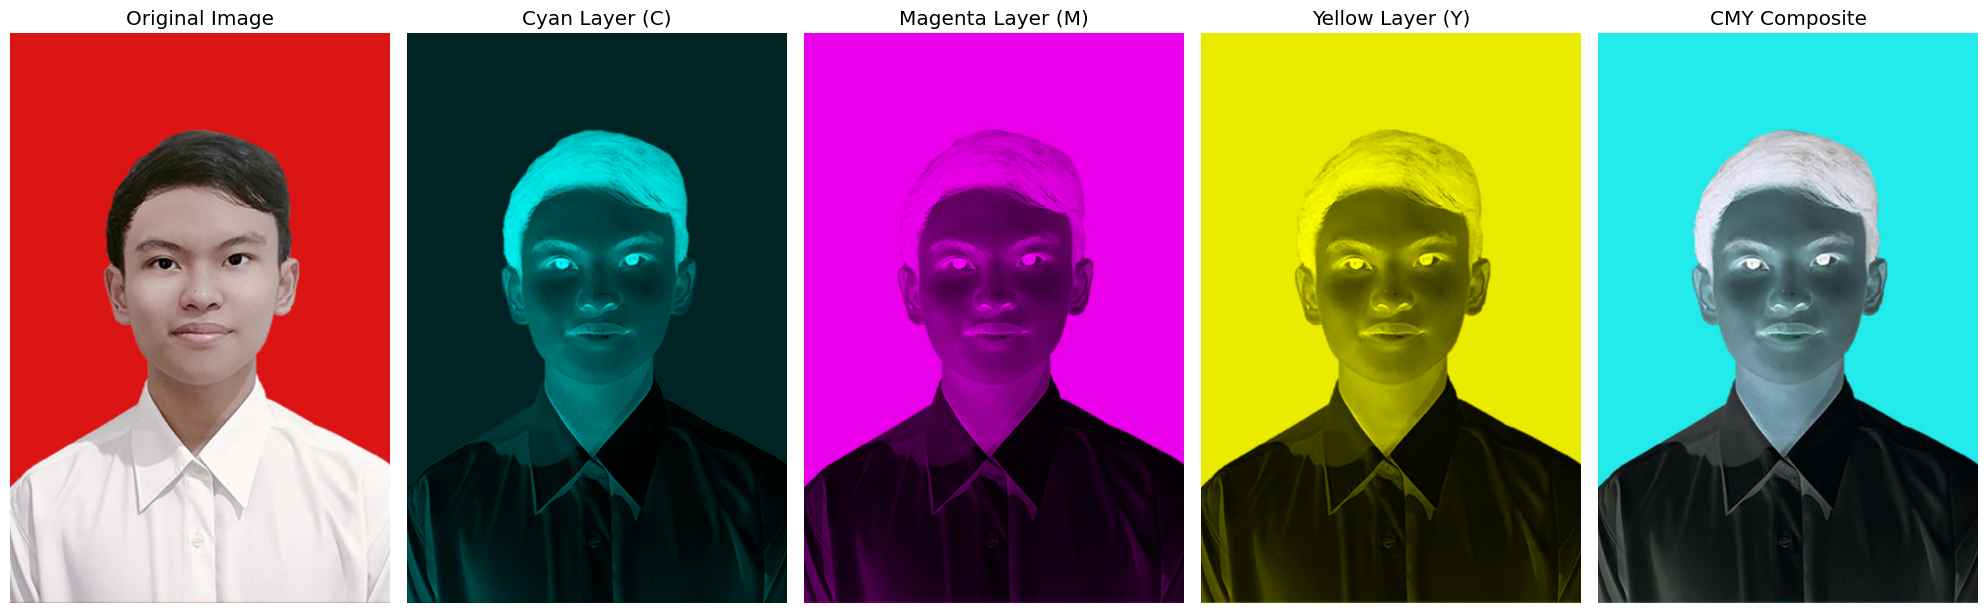

In [ ]:
cyan, magenta, yellow, cmy = rgb_to_cmy(img_matplotlib)

fig, axs = pltlib.subplots(1, 5, figsize=(20, 6))
axs = axs.ravel()

axs[0].imshow(img_matplotlib)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(cyan)
axs[1].set_title('Cyan Layer (C)')
axs[1].axis('off')

axs[2].imshow(magenta)
axs[2].set_title('Magenta Layer (M)')
axs[2].axis('off')

axs[3].imshow(yellow)
axs[3].set_title('Yellow Layer (Y)')
axs[3].axis('off')

axs[4].imshow(cmy)
axs[4].set_title('CMY Composite')
axs[4].axis('off')

pltlib.tight_layout()
pltlib.show()

In [ ]:
# Convert RGB to 

# CMYK
def rgb_to_cmyk(img):
    # Convert image to float
    image_float = img.astype(np.float32) / 255.0
    
    # Calc K (Key/Black)
    K = 1 - np.max(image_float, axis=2)
    
    # Calc CMY with zero division handling
    with np.errstate(divide='ignore', invalid='ignore'):
        C = np.where(K < 1, (1 - image_float[..., 0] - K) / (1 - K), 0)
        M = np.where(K < 1, (1 - image_float[..., 1] - K) / (1 - K), 0)
        Y = np.where(K < 1, (1 - image_float[..., 2] - K) / (1 - K), 0)
    
    # Clipping for validation
    cyan = np.clip(C, 0, 1)
    magenta = np.clip(M, 0, 1)
    yellow = np.clip(Y, 0, 1)
    key = np.clip(K, 0, 1)

    # Visualization (RGB-style)
    cyan_image = ((np.stack([np.zeros_like(cyan), cyan, cyan], axis=2)) * 255).astype(np.uint8)
    magenta_image = ((np.stack([magenta, np.zeros_like(magenta), magenta], axis=2)) * 255).astype(np.uint8)
    yellow_image = ((np.stack([yellow, yellow, np.zeros_like(yellow)], axis=2)) * 255).astype(np.uint8)
    key_image = ((np.stack([key, key, key], axis=2)) * 255).astype(np.uint8)
    
    # CMYK
    cmyk_image = ((np.stack([cyan, magenta, yellow, key], axis=2)) * 255).astype(np.uint8)

    return cyan_image, magenta_image, yellow_image, key_image, cmyk_image

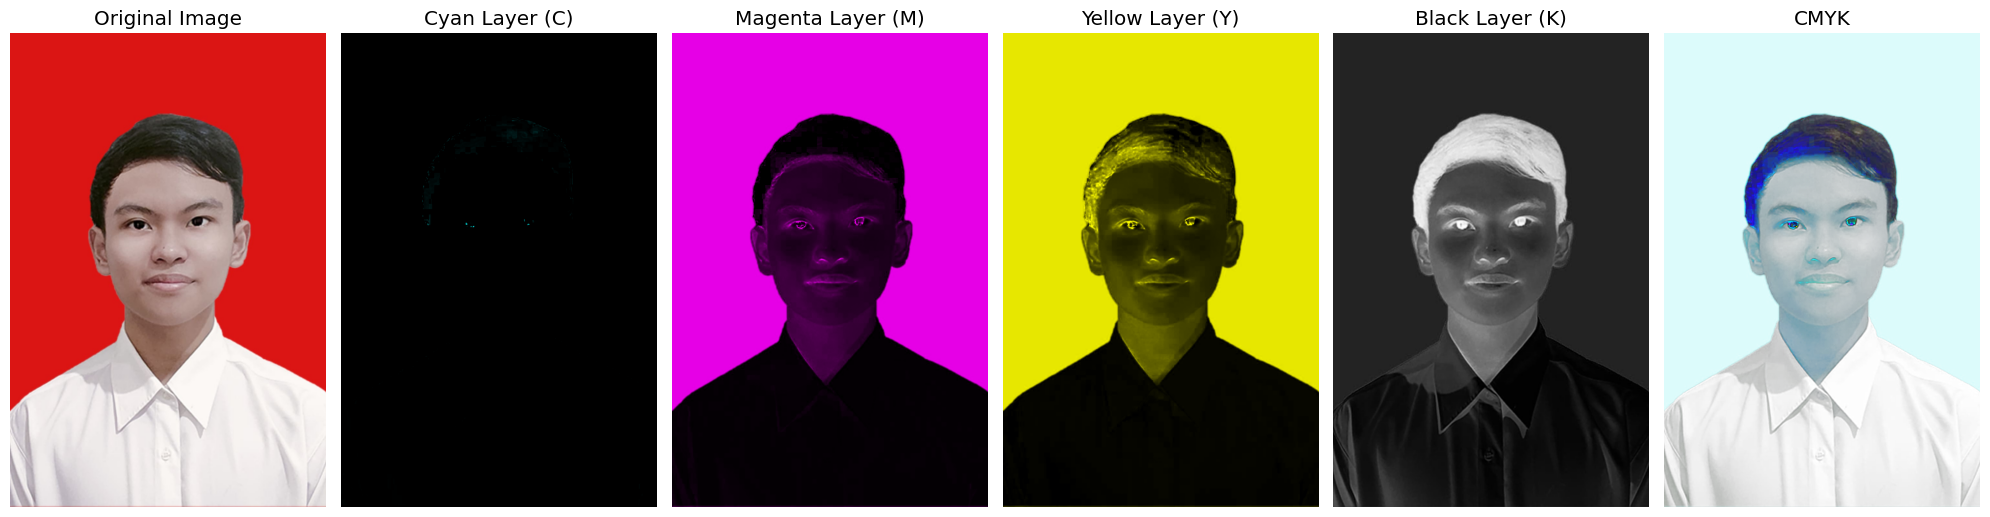

In [84]:
cyan, magenta, yellow, black, cmyk = rgb_to_cmyk(img_matplotlib)

# Tampilkan hasil
fig, axs = pltlib.subplots(1, 6, figsize=(20, 6))
axs = axs.ravel()

axs[0].imshow(img_matplotlib)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(cyan)
axs[1].set_title('Cyan Layer (C)')
axs[1].axis('off')

axs[2].imshow(magenta)
axs[2].set_title('Magenta Layer (M)')
axs[2].axis('off')

axs[3].imshow(yellow)
axs[3].set_title('Yellow Layer (Y)')
axs[3].axis('off')

axs[4].imshow(black)
axs[4].set_title('Black Layer (K)')
axs[4].axis('off')

axs[5].imshow(cmyk)
axs[5].set_title('CMYK')
axs[5].axis('off')

pltlib.tight_layout()
pltlib.show()


In [ ]:
# Convert RGB to 

# HSI

def rgb_to_hsi(image):
    image_float = image.astype(np.float32) / 255.0
    R, G, B = image_float[..., 0], image_float[..., 1], image_float[..., 2]

    # Intensity
    I = (R + G + B) / 3

    # Saturation
    min_rgb = np.minimum(np.minimum(R, G), B)
    S = 1 - (3 / (R + G + B + 1e-8)) * min_rgb

    # Hue
    num = 0.5 * ((R - G) + (R - B))
    den = np.sqrt((R - G) ** 2 + (R - B) * (G - B)) + 1e-8
    theta = np.arccos(np.clip(num / den, -1, 1))
    H = np.where(B <= G, theta, 2 * np.pi - theta)
    H = H / (2 * np.pi)  # Normalize to [0, 1]

    # Convert to 8-bit images
    H_image = (H * 255).astype(np.uint8)
    S_image = (S * 255).astype(np.uint8)
    I_image = (I * 255).astype(np.uint8)

    return H_image, S_image, I_image


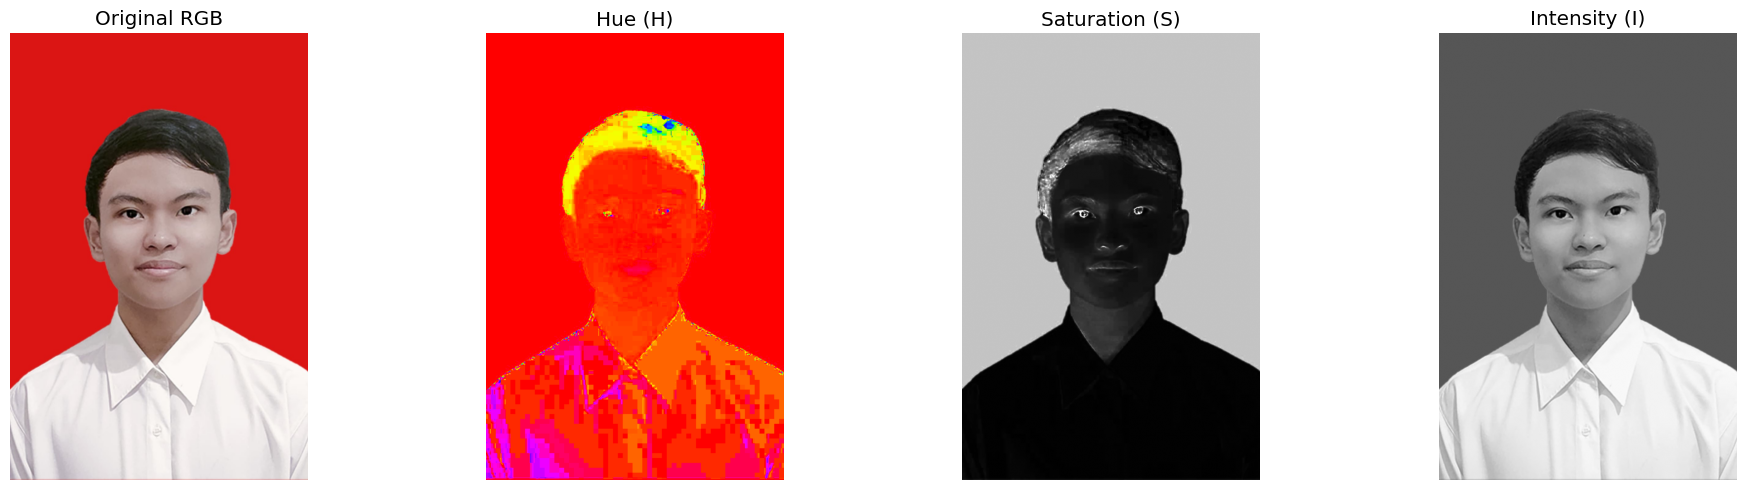

In [93]:
H_img, S_img, I_img = rgb_to_hsi(img_matplotlib)

# Tampilkan gambar
fig, axs = pltlib.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(img_matplotlib)
axs[0].set_title('Original RGB')
axs[0].axis('off')

axs[1].imshow(H_img, cmap='hsv')  # Hue pakai cmap khusus
axs[1].set_title('Hue (H)')
axs[1].axis('off')

axs[2].imshow(S_img, cmap='gray')
axs[2].set_title('Saturation (S)')
axs[2].axis('off')

axs[3].imshow(I_img, cmap='gray')
axs[3].set_title('Intensity (I)')
axs[3].axis('off')

pltlib.tight_layout()
pltlib.show()

In [85]:
# Convert RGB to 

# YUV

def rgb_to_yuv(image):
    # Convert RGB to YUV with OpenCV
    yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    
    # Split the channel
    Y, U, V = cv2.split(yuv)
    
    return Y, U, V, yuv


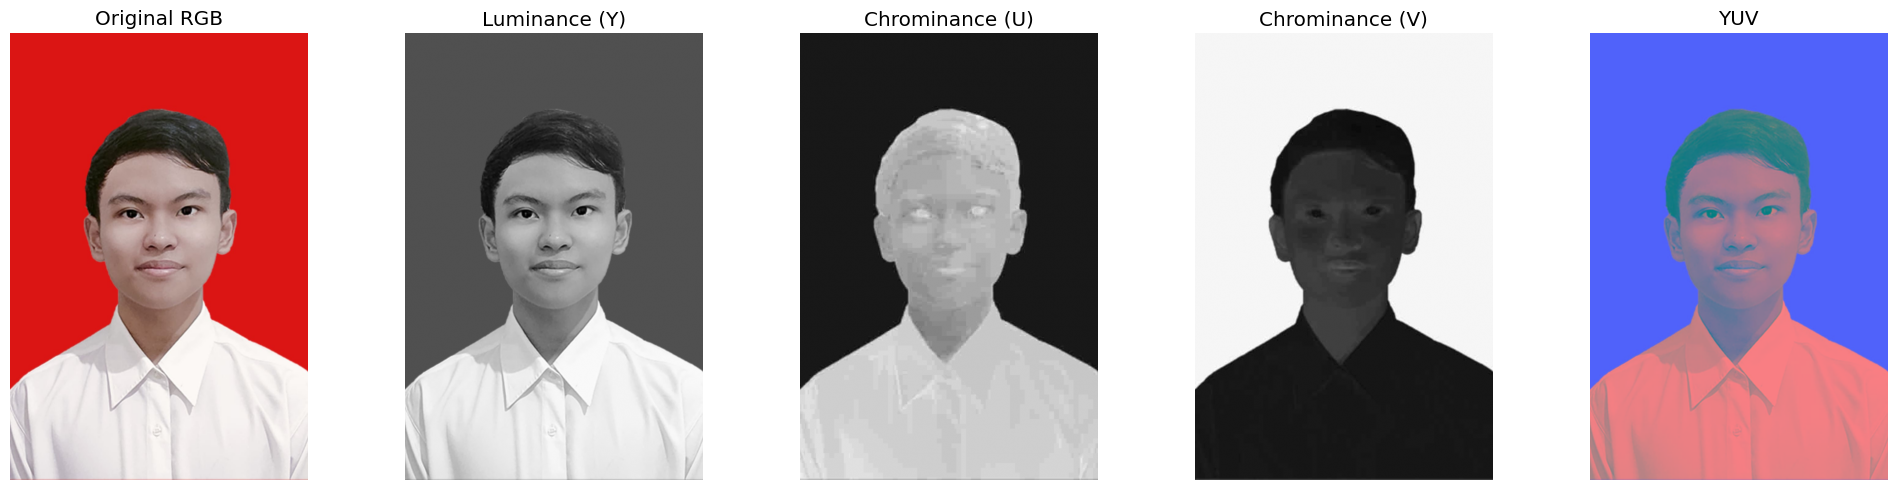

In [94]:
Y, U, V, yuv_img = rgb_to_yuv(img_matplotlib)

# Tampilkan gambar
fig, axs = pltlib.subplots(1, 5, figsize=(20, 5))

axs[0].imshow(img_matplotlib)
axs[0].set_title('Original RGB')
axs[0].axis('off')

axs[1].imshow(Y, cmap='gray')
axs[1].set_title('Luminance (Y)')
axs[1].axis('off')

axs[2].imshow(U, cmap='gray')
axs[2].set_title('Chrominance (U)')
axs[2].axis('off')

axs[3].imshow(V, cmap='gray')
axs[3].set_title('Chrominance (V)')
axs[3].axis('off')

axs[4].imshow(yuv_img, cmap='gray')
axs[4].set_title('YUV')
axs[4].axis('off')

pltlib.tight_layout()
pltlib.show()

In [97]:
# Convert RGB to 

# YCbCr

def rgb_to_ycbcr(image):
    # Convert RGB to YUV with OpenCV
    ycbcr = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    
    # Split the channel
    Y, Cr, Cb = cv2.split(ycbcr)
    
    return Y, Cb, Cr, ycbcr

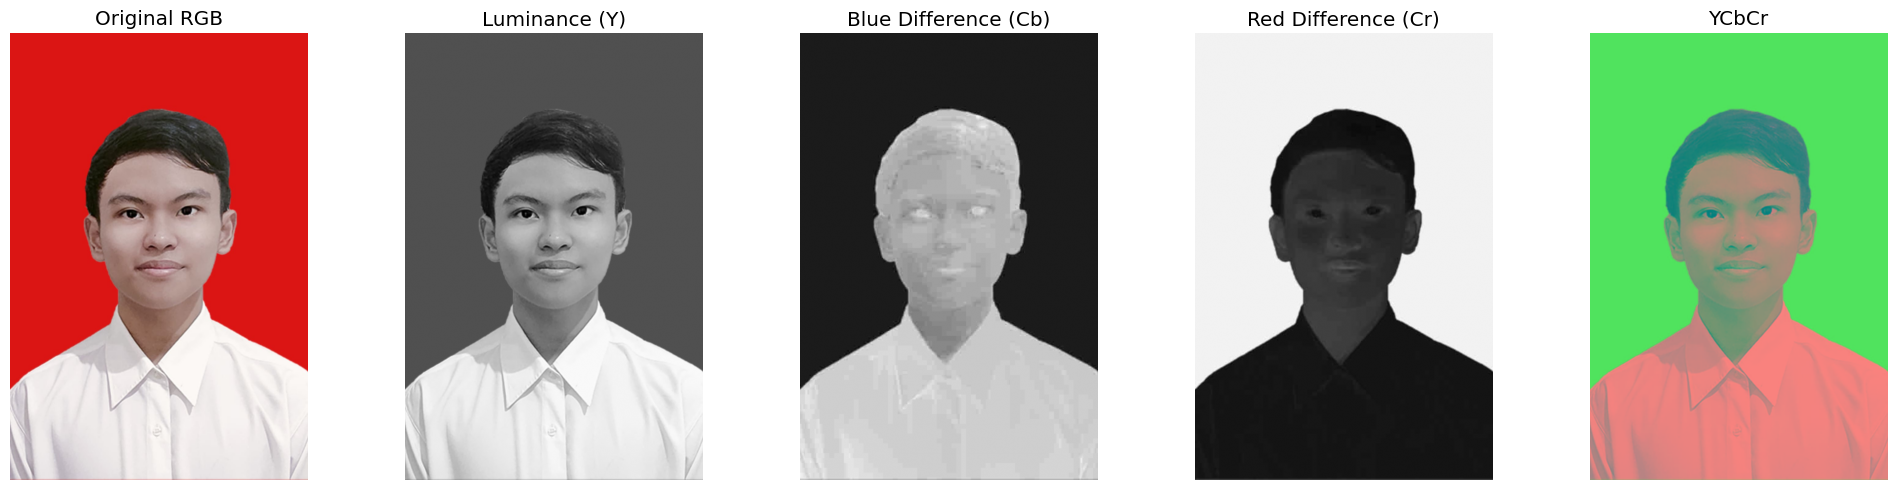

In [98]:
Y, Cb, Cr, ycbcr_img = rgb_to_ycbcr(img_matplotlib)

# Tampilkan gambar
fig, axs = pltlib.subplots(1, 5, figsize=(20, 5))

axs[0].imshow(img_matplotlib)
axs[0].set_title('Original RGB')
axs[0].axis('off')

axs[1].imshow(Y, cmap='gray')
axs[1].set_title('Luminance (Y)')
axs[1].axis('off')

axs[2].imshow(Cb, cmap='gray')
axs[2].set_title('Blue Difference (Cb)')
axs[2].axis('off')

axs[3].imshow(Cr, cmap='gray')
axs[3].set_title('Red Difference (Cr)')
axs[3].axis('off')

axs[4].imshow(ycbcr_img, cmap='gray')
axs[4].set_title('YCbCr')
axs[4].axis('off')

pltlib.tight_layout()
pltlib.show()

In [113]:
# Color Image Smoothing
def smoothing(img):
    # Gaussian Blur
    gaussian_blur = cv2.GaussianBlur(img, (5,5), 0)
    
    # Average Blur
    avg_blur = cv2.blur(img, (15,15))
    
    # Median Blur
    median_blur = cv2.medianBlur(img, 25)
    
    # Bilateral Filter
    bilateral_blur = cv2.bilateralFilter(img, 50, 75, 75)
    
    # Box Filter
    box_blur = cv2.boxFilter(img, -1, (30, 30), normalize=True)

    return gaussian_blur, avg_blur, median_blur, bilateral_blur, box_blur


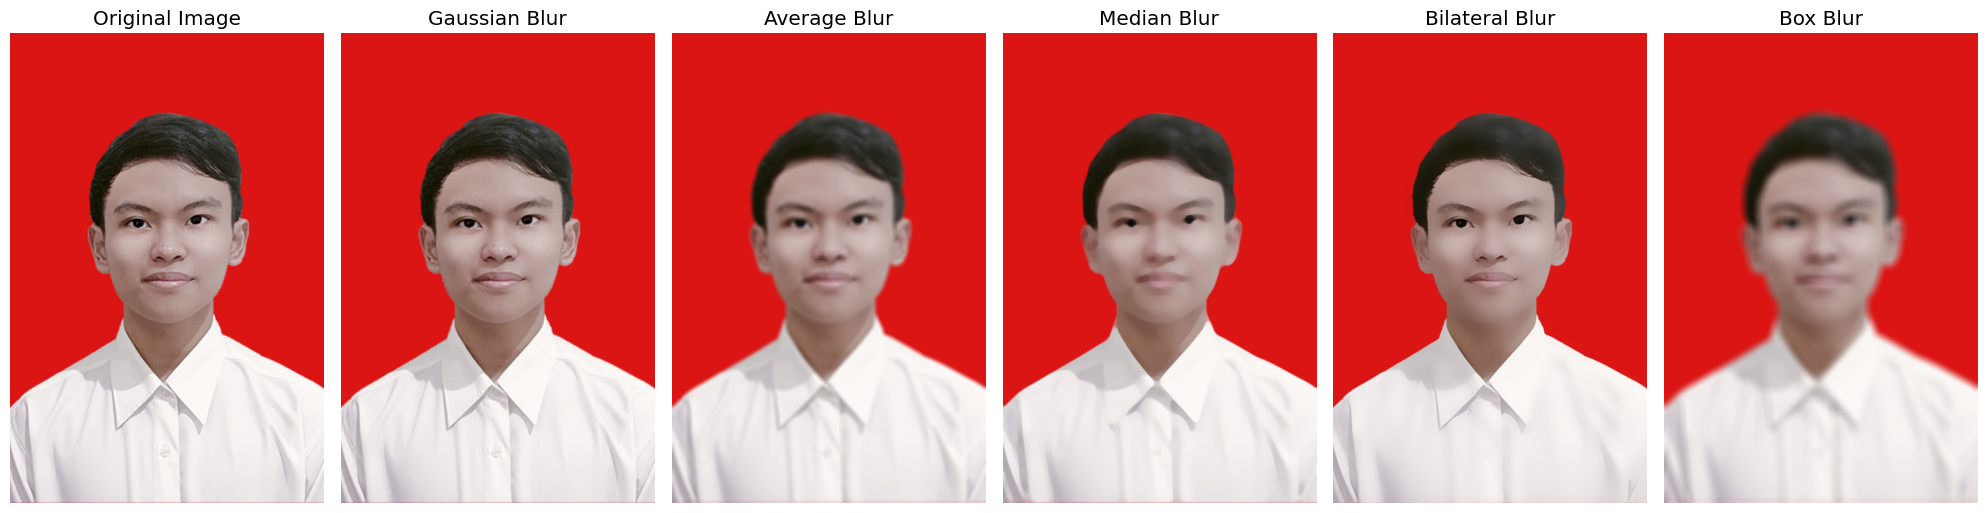

In [114]:
gaussian, avg, median, bilateral, box = smoothing(img_matplotlib)

# Tampilkan gambar
fig, axs = pltlib.subplots(1, 6, figsize=(20, 5))

axs[0].imshow(img_matplotlib)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(gaussian)
axs[1].set_title('Gaussian Blur')
axs[1].axis('off')

axs[2].imshow(avg)
axs[2].set_title('Average Blur')
axs[2].axis('off')

axs[3].imshow(median)
axs[3].set_title('Median Blur')
axs[3].axis('off')

axs[4].imshow(bilateral)
axs[4].set_title('Bilateral Blur')
axs[4].axis('off')

axs[5].imshow(box)
axs[5].set_title('Box Blur')
axs[5].axis('off')

pltlib.tight_layout()
pltlib.show()

In [159]:
def sharpening(img):
    sharpening = np.array([[0, -1, 0],
                           [-1, 5.3, -1],
                           [0, -1, 0]])
    sharpened = cv2.filter2D(img, -1, sharpening)
    return sharpened

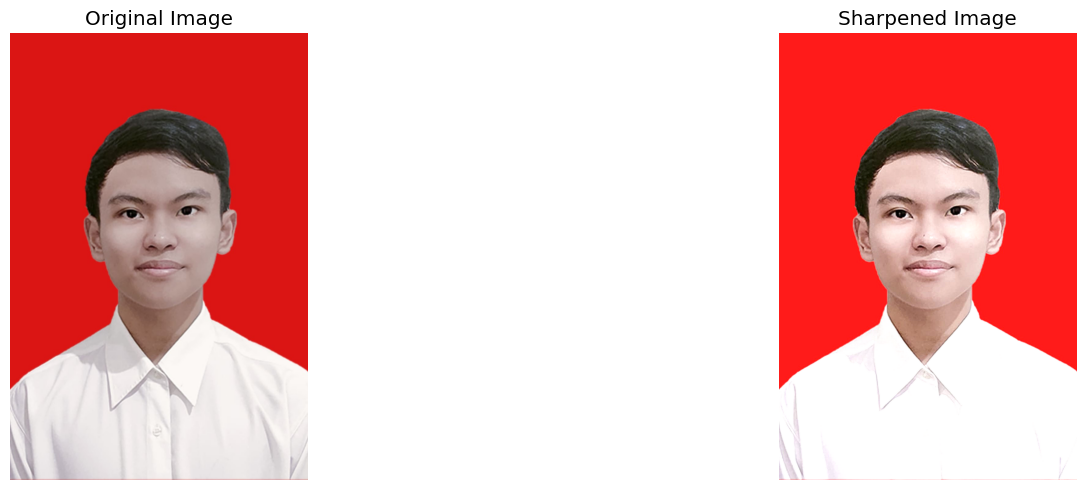

In [160]:
sharpened_img = sharpening(img_matplotlib)
fig, axs = pltlib.subplots(1, 2, figsize=(20, 5))

axs[0].imshow(img_matplotlib)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(sharpened_img)
axs[1].set_title('Sharpened Image')
axs[1].axis('off')

pltlib.tight_layout()
pltlib.show()